Task:
Analysis Tasks

Basic Statistics tasks

1. Which store has maximum sales

2. (a)Which store has maximum standard deviation i.e., the sales vary a lot. (b)Also, find out the coefficient of mean to standard deviation

3. Which store/s has good quarterly growth rate in Q3’2012

4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5. Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [1]:
# read data as pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import dates
df = pd.read_csv("/content/Walmart_Store_sales.csv")

In [2]:
#view the top records of the data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:

df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

1. Which store has maximum sales?

In [4]:
#1. Which store has maximum sales
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False) 
max_sales_store = total_sales.head(1).index
max_sales_amount = total_sales.head(1).values
print("Store with max_sales is:",str(max_sales_store.values))
print("Max sale amount is:",float(max_sales_amount))

Store with max_sales is: [20]
Max sale amount is: 301397792.46


2(a). Which store has maximum standard deviation?

In [5]:
#2(a). Which store has maximum standard deviation
walmart_data_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
walmart_data_std.head(1)

,Weekly_Sales
Store,
14,317569.949476


2(b). Max oefficient of mean to standard deviation

In [6]:
#2(b). Coefficient of mean to standard deviation
coef = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef = coef.sort_values(by='Weekly_Sales', ascending = False)
coef.head(1)

,Weekly_Sales
Store,
35,0.229681


3. Store with good quarterly rate in Q3 - 2012

In [7]:
#3. Store with good quarterly rate in Q3 - 2012
quarter_3_sales= df[(df['Date'] >= '01-07-2012') & (df['Date'] <= '30-09-2012')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales.sort_values(ascending=False).head(1)

Store
20    2.893680e+08
Name: Weekly_Sales, dtype: float64

4. Holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [8]:
#Defining holiday dates
Super_Bowl =['12-02-2010', '11-02-2011', '10-02-2012','08-02-2013']
Labour_Day =  ['10-09-2010', '09-09-2011', '07-09-2012','06-09-2013']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012','27-12-2013']

In [9]:
#Calculating mean sales on holidays : 
Super_Bowl_Sales = (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(df.loc[df.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(df.loc[df.Date.isin(Christmas)]))['Weekly_Sales'].mean()
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.9877037038, 1042427.293925926, 1471273.427777778, 960833.1115555555)

In [10]:
#Calculating mean sales on non-holidays :
Non_Holiday_Sales = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088555

In [11]:
#Combine all the sales and take the max
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}
Mean_Sales 

{'Super_Bowl_Sales': 1079127.9877037038,
 'Labour_Day_Sales': 1042427.293925926,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555555,
 'Non_Holiday_Sales': 1041256.3802088555}

In [12]:
max(Mean_Sales.items(), key = lambda x: x[1])

('Thanksgiving_Sales', 1471273.427777778)

5. Monthly and semester view of sales in units and give insights

In [13]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [14]:
df[['date', 'month', 'year']] = pd.DataFrame([ x.split('-') for x in df['Date'].tolist() ])

In [15]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,month,year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


Text(0, 0.5, 'Weekly_Sales')

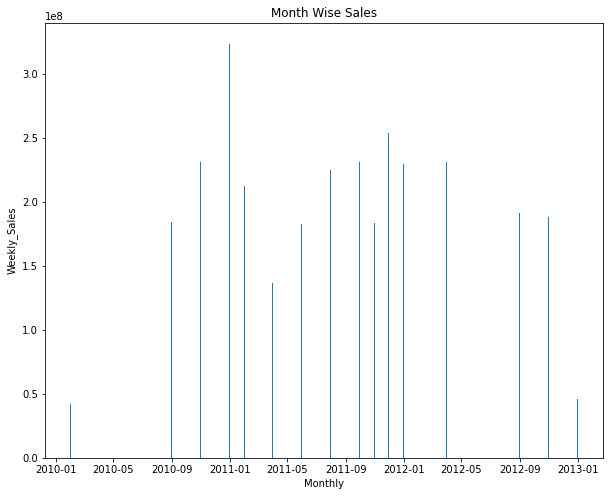

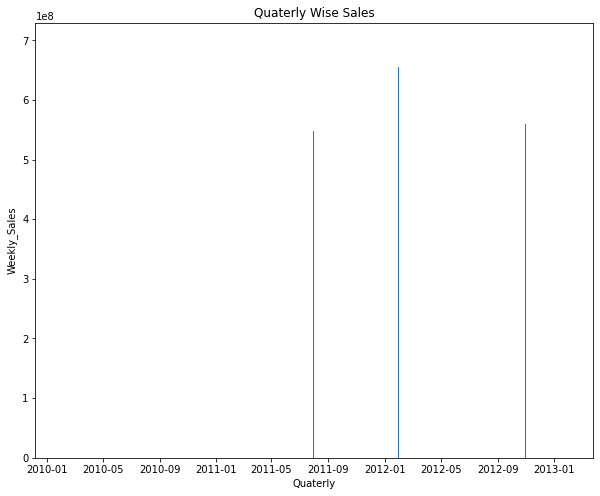

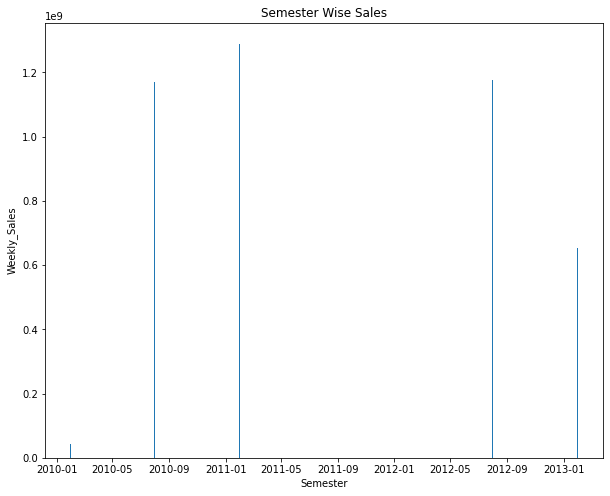

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
#Monthly sales 
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
#fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.figure(figsize=(10,8))
plt.bar(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')
#Quaterly Sales 
Quaterly = df.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
#fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.figure(figsize=(10,8))
plt.bar(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')
#Semester Sales 
Semester = df.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
#fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.figure(figsize=(10,8))
plt.bar(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

Regression Modelling

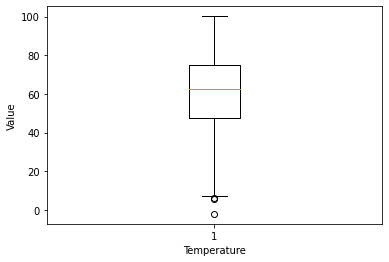

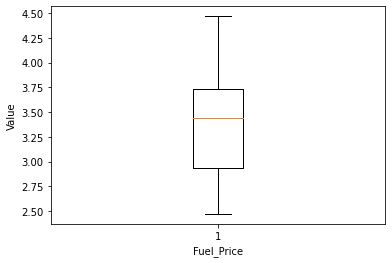

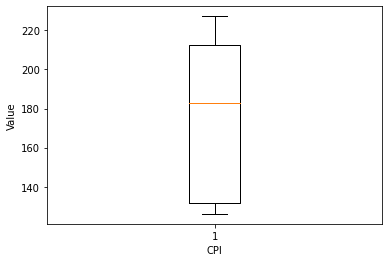

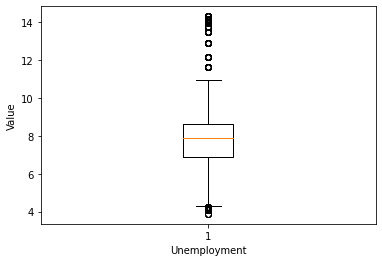

In [17]:
#Data Preparation
#Detecting outliers :
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()
    
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Dropping outliers     
df_cleaned = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
df_cleaned = df_cleaned.dropna()

In [19]:
df_cleaned

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [20]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
# not using date as it is insignificant 
X = df_cleaned[['Temperature','Fuel_Price','CPI','Unemployment','Holiday_Flag']]
Y = df_cleaned['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


Linear Regression:
R Square Value: 0.0056480451844787005
Mean Absolute Error: 481190.02190824976
Mean Squared Error: 329063239112.72235
Root Mean Squared Error: 573640.339509629


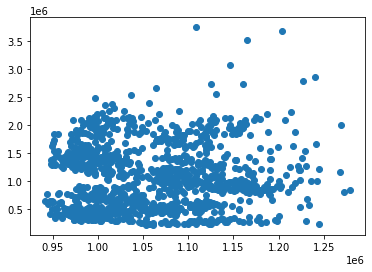

In [21]:
print('Linear Regression:')
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
r_square_value = r2_score(Y_test, Y_pred)
print('R Square Value:',r_square_value)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
plt.scatter(Y_pred, Y_test)

Random Forest Regressor:
R Square Value: 0.0867963191077411
Mean Absolute Error: 392744.9954925762
Mean Squared Error: 302208649310.5136
Root Mean Squared Error: 549735.0719305743


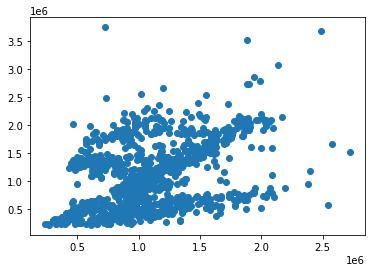

In [22]:
print('Random Forest Regressor:')
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
r_square_value = r2_score(Y_test, Y_pred)
print('R Square Value:',r_square_value)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
plt.scatter(Y_pred, Y_test)

Decision Tree Regressor:
R Square Value: -0.323413885940947
Mean Absolute Error: 427697.6098660189
Mean Squared Error: 437960480577.80237
Root Mean Squared Error: 661785.8268184672


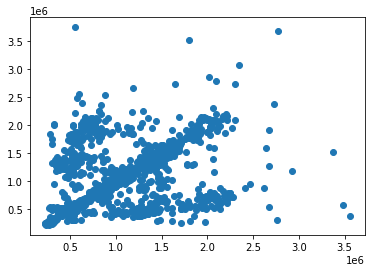

In [23]:
print('Decision Tree Regressor:')
dtr = DecisionTreeRegressor()        
dtr.fit(X_train,Y_train)
Y_pred = dtr.predict(X_test)
r_square_value = r2_score(Y_test, Y_pred)
print('R Square Value:',r_square_value)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
plt.scatter(Y_pred, Y_test)